# 펭귄 몸무게 예측 경진대회
1. train.csv : 학습 데이터

    - id : 샘플 아이디
    - Species: 펭귄의 종을 나타내는 문자열
    - Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
    - Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
    - Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
    - Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
    - Flipper Length (mm) : 펭귄의 팔(날개) 길이
    - Sex : 펭귄의 성별
    - Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
    - Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
    - Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


2. test.csv : 테스트 데이터
    - train.csv 스키마에서 에서 Body Mass (g) 제외

3. sample_submissoin.csv : 제출 양식
    - id : 샘플 아이디
    - Body Mass (g) : 펭귄의 몸무게를 나타내는 숫자 (g)

[데이터 상세 설명](https://allisonhorst.github.io/palmerpenguins/)

    성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다. 남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측정, 클러치 관찰 및 혈액 동위원소 비율. 데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.

- [참고- 분석관련](https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html)  
- [참고 : PCA1](https://ooyoung.tistory.com/78)
- [참고 레퍼런스](https://dacon.io/competitions/official/235862/codeshare/4068?page=1&dtype=recent)

## 1.1 Read DataSet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data 
train_data = pd.read_csv('../data/train.csv').sort_values(by='id',ascending=True)
test_data = pd.read_csv('../data/test.csv').sort_values(by='id',ascending=True)

# Print Data Size
print("train 데이터 크기 : %s 행 %s 열" % train_data.shape)
print("test  데이터 크기 : %s 행 %s 열" % test_data.shape)

# Species Data 짧게 변경
train_data["Species"] = train_data["Species"].apply(lambda x : x.split()[0])
test_data["Species"] = test_data["Species"].apply(lambda x : x.split()[0])

# 열이름 변경
col_rename = { 
"Clutch Completion":"Clutch",
"Culmen Length (mm)":"C_Len",
"Culmen Depth (mm)":"C_Dep",
"Flipper Length (mm)":"F_Len",
"Delta 15 N (o/oo)":"15_N",
"Delta 13 C (o/oo)":"13_C",
}
# 열이름 변경
train_data.rename(columns = col_rename, inplace=True)
test_data.rename(columns = col_rename, inplace=True)

# 열 카테고리화
cols_categorical = ["Species","Island","Clutch","Sex"]
for colName in cols_categorical:
    train_data[colName] = train_data[colName].astype('category')
    test_data[colName] = test_data[colName].astype('category')

# Data 예시출력
display( train_data.head(2) )
display( train_data.tail(2) )
display( test_data.head(2) )
display( test_data.tail(2) )

train 데이터 크기 : 114 행 11 열
test  데이터 크기 : 228 행 10 열


,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Body Mass (g)
0,0,Gentoo,Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap,Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800


,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Body Mass (g)
112,112,Chinstrap,Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700
113,113,Gentoo,Biscoe,Yes,50.8,17.3,228,MALE,8.27428,-26.30019,5600


,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C
0,0,Chinstrap,Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo,Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425


,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C
226,226,Chinstrap,Dream,Yes,50.5,19.6,201.0,MALE,9.8059,-24.72940
227,227,Adelie,Biscoe,Yes,37.6,19.1,194.0,MALE,9.1080,-25.89677


## 1.2 Train set 과 Test set Data 분포 비교
- Train set과 Test set의 Data 분포가 비슷하고, 눈에 띄는 이상값은 없다
- Gentoo 펭귄과 chinstrap 펭귄은 Train, Test셋 모두 1개 섬에만 산다. 
- 종, 성별에 따라 F_Len(날개 길이), C_Len(부리 가로 길이), C_Dep(부리 세로 길이) 분포가 유의미하게 다르다

C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% o

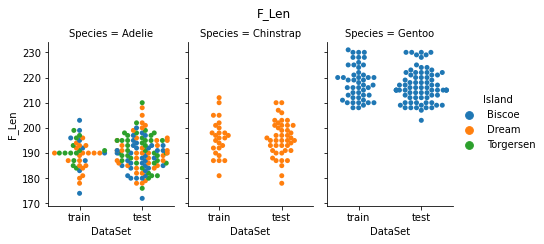

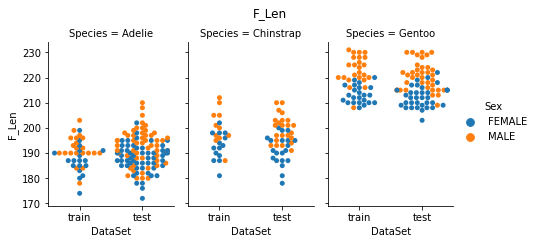

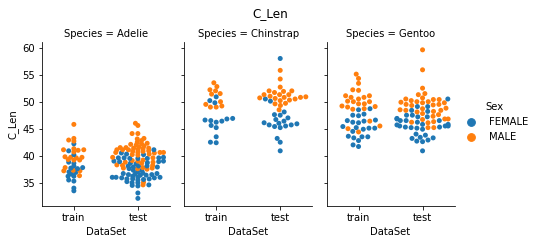

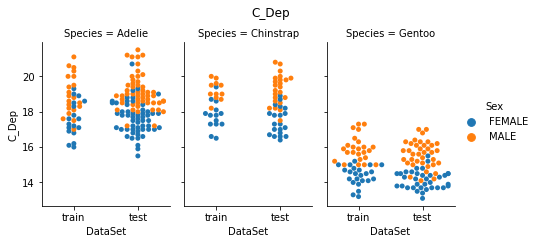

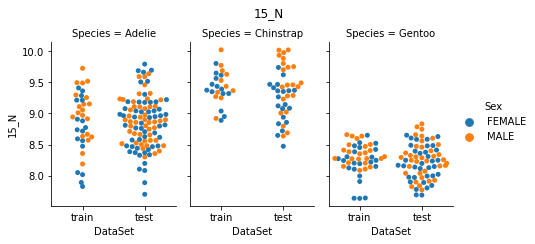

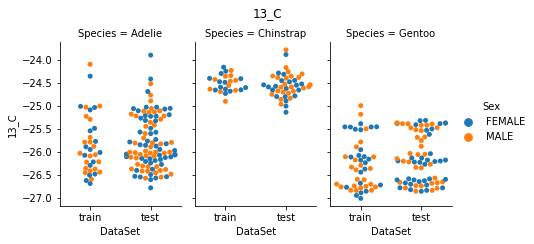

In [2]:
def cat(dataset,y_Data,hue_Data="Sex"):        
    g = sns.catplot(data=dataset,x="DataSet", y=y_Data, col="Species",
                hue=hue_Data, height=3, aspect=0.7, kind="swarm")
    g.fig.suptitle(y_Data,y=1.05)
    display(g)
    
cols = ['Species', 'Island', 'Clutch', 'Sex','C_Len', 'C_Dep', 'F_Len', '15_N', '13_C']
df1 = train_data.loc[:,cols] ; df1['DataSet'] = 'train'
df2 = test_data.loc[:,cols]  ; df2['DataSet'] = 'test'
total_df = pd.concat([df1,df2],ignore_index=True)

cat(total_df,"F_Len", hue_Data = "Island")
cat(total_df,"F_Len")
cat(total_df,"C_Len")
cat(total_df,"C_Dep")
cat(total_df,"15_N")
cat(total_df,"13_C")

## 1.3. Check Categorical Field
- 범주형 변수의 데이터 보기

In [3]:
# 범주형 열이름, 수치형 열이름 추출
cols_categorical = ["Species","Island","Clutch","Sex"]
cols_numerical = list(filter(lambda x : not x in ['id',*cols_categorical],list(train_data.columns)))

print(f"numerical\t: {cols_numerical}")
print(f"categorical\t: {cols_categorical}")

print("\nCheck categories")
for col in cols_categorical: 
    print(col, list(train_data[col].cat.categories), sep="\t: ")

numerical	: ['C_Len', 'C_Dep', 'F_Len', '15_N', '13_C', 'Body Mass (g)']
categorical	: ['Species', 'Island', 'Clutch', 'Sex']

Check categories
Species	: ['Adelie', 'Chinstrap', 'Gentoo']
Island	: ['Biscoe', 'Dream', 'Torgersen']
Clutch	: ['No', 'Yes']
Sex	: ['FEMALE', 'MALE']


## 1.4. Check Null
- 변수별 결측값 개수 보기
- 결측값이 포함된 data 보기

In [4]:
# pd.isnull(train_data)
print("Train - 결측값 개수")
display(train_data.isnull().sum().loc[lambda x : x>0]) # 항목별 결측값 수
display(train_data.loc[train_data.isnull().sum(axis=1).apply(lambda x : x>0)]) # 결측값 1개라도 포함

print("Test - 결측값 개수")
display(test_data.isnull().sum().loc[lambda x : x>0]) # 항목별 결측값 수
display(test_data.loc[test_data.isnull().sum(axis=1).apply(lambda x : x>0)]) # 결측값 1개라도 포함

Train - 결측값 개수


Sex     3
15_N    3
13_C    3
dtype: int64

,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Body Mass (g)
6,6,Adelie,Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie,Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie,Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo,Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie,Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


Test - 결측값 개수


Sex     6
15_N    9
13_C    8
dtype: int64

,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C
27,27,Adelie,Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
46,46,Adelie,Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
75,75,Chinstrap,Dream,Yes,51.9,19.5,206.0,MALE,NaN,-23.78767
81,81,Adelie,Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,98,Gentoo,Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
106,106,Gentoo,Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
152,152,Gentoo,Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
159,159,Adelie,Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,175,Adelie,Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,202,Adelie,Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN


## 2 Visualize Data (몸무게와 관련 있는 변수 찾기)

#### Effective [Body Mass]
- [2.1.1] Sex : Male > Female 
- [2.1.1] Species : Gento > Chinstrip >= Adelie  
- [2.1.2] Species && Sex로 집단을 나누면 Body Mass에 유의미한 차이를 보임
- [2.2.2] Species && Sex로 집단은 [C_Dep,C_Len,F_Len]에서 정규분포와 유사한 분포를 갖는다.

#### ignorable [Body Mass]
- [2.1.3] Clutch : data가 적어서 편향됨 
- [2.1.3] Island : Species와 Sex가 같은 집단 내에서 특별한 역할을 하지 않음 

## 2.1 Find Effectice Variables [Categorical]

#### 2.1.1. Swarm plot (Body Mass) by Sex,Species
- Sex : Male > Female
- Species : Gento > Chinstrip >= Adelie 

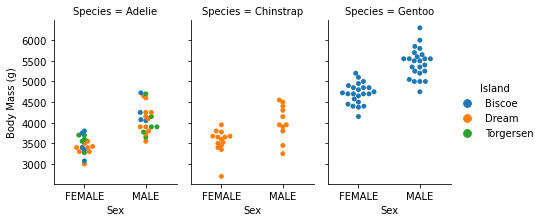

In [5]:
# swarm plot (그림 2.1.1)
sns.catplot(x="Sex", y="Body Mass (g)", col="Species",
            hue="Island", height=3, aspect=0.7, 
            kind="swarm", data=train_data)

#### 2.1.2. Box plot (Body Mass) by Sex,Species

- [Species && Sex]로 집단을 나누었을 때, Body Mass에 유의미한 차이를 보임

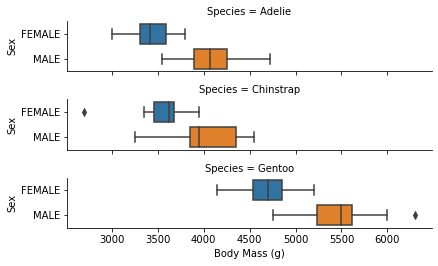

In [6]:
# box plot  (그림2.1.2)
sns.catplot(x="Body Mass (g)", y="Sex", row="Species", 
            orient="h", height=1.2, aspect=5, 
            kind="box", data=train_data)

#### 2.1.3. Swarm plot (Body Mass) by Clutch,Island
- Clutch : data가 적어서 편향됨
- Island : Species와 Sex가 같은 집단 내에서 특별한 역할을 하지 않음

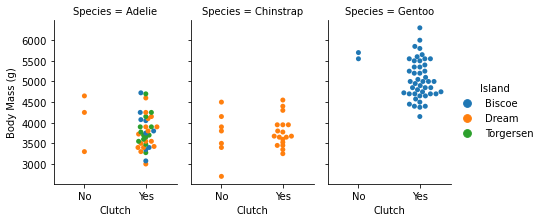

In [7]:
# swarm plot  (그림2.1.3)
sns.catplot(x="Clutch", y="Body Mass (g)", col="Species",
            hue="Island", height=3, aspect=0.7, 
            kind="swarm", data=train_data)

## 2.2 Find Effectice Variables [Numerical]
- 종,성별에 따른 학습 모델이 필요하다.

### 2.2.1. Pair plot - Group(Species)

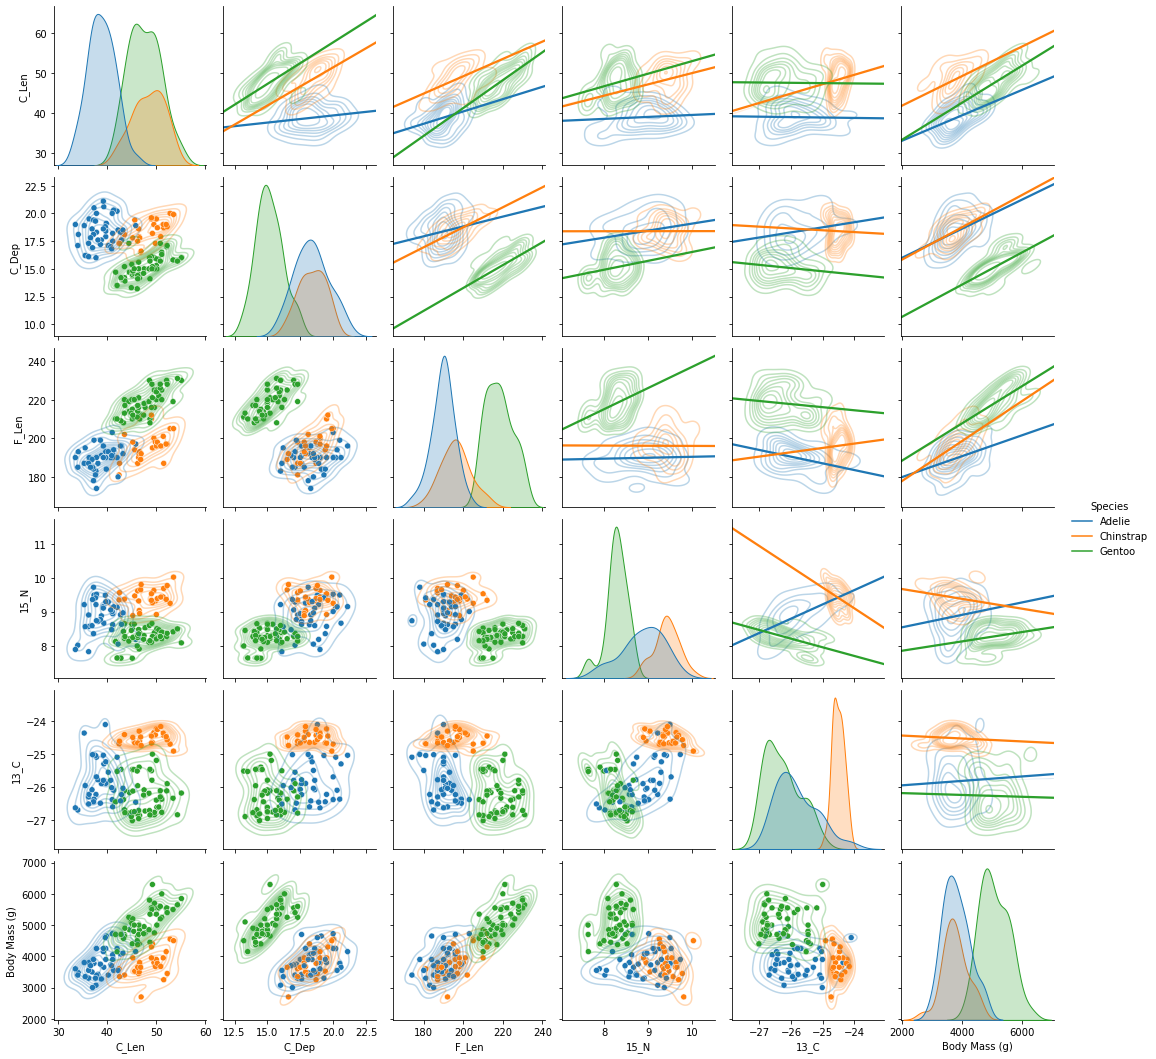

In [8]:
hue_Data = "Species"
g = sns.pairplot(train_data[[*cols_numerical,hue_Data]], hue=hue_Data, kind="kde", plot_kws={"alpha":0.3})
g.map_lower(sns.scatterplot)
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=True)

### 2.2.2 Pair plot - Group(Species  && Sex)

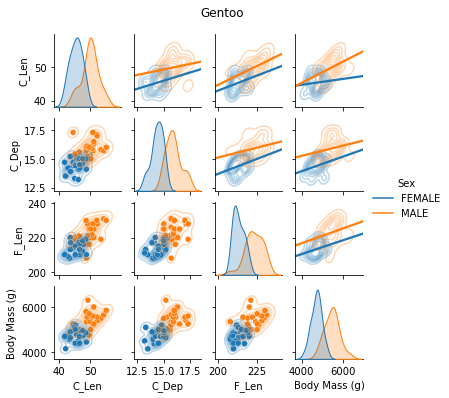

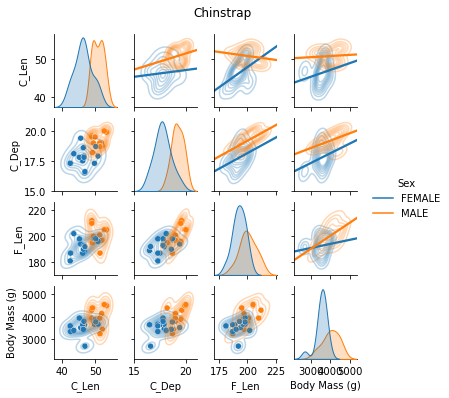

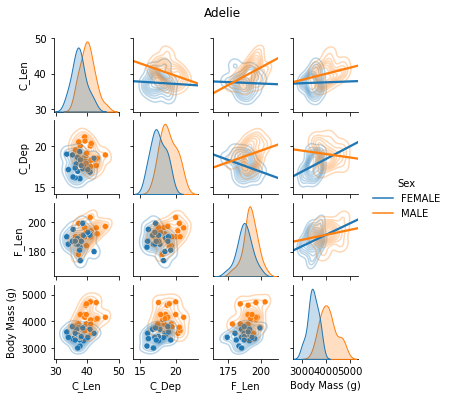

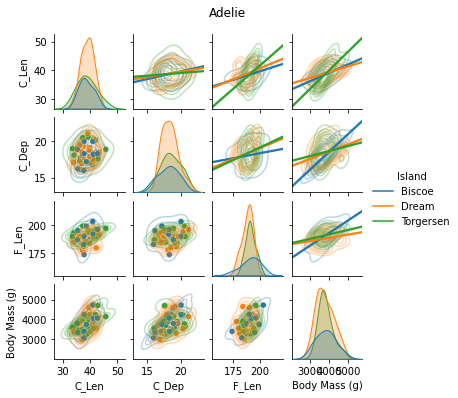

In [9]:
def pair_Species(Species_Data, hue_Data): 
    cols = [hue_Data,'Species', 'C_Len', 'C_Dep', 'F_Len', 'Body Mass (g)']
    df = train_data[train_data["Species"] == Species_Data].loc[:,cols].sort_values(by=hue_Data,ascending=False)

    g = sns.pairplot(df, hue=hue_Data, kind="kde", plot_kws={"alpha":0.3}, height=1.3)
    g.map_lower(sns.scatterplot)
    g.map_upper(sns.regplot, scatter=False, truncate=False, ci=True)    
    g.fig.suptitle(Species_Data,y=1.05)
    display(g)    

pair_Species("Gentoo",'Sex')
pair_Species("Chinstrap",'Sex')
pair_Species("Adelie",'Sex')
pair_Species("Adelie",'Island')

## 3. Set Cluster 
Species , Sex 별로 구룹을 나눠서 따로 학습 시킬 준비

Cluster | Species | Sex
:--:|:--:|:--:
0 | Gentoo | FEMALE
1 | Gentoo | MALE
2 | Chinstrap | FEMALE
3 | Chinstrap | MALE
4 | Adelie | FEMALE
5 | Adelie | MALE

In [10]:
def Prepare_Data(df):
    df.at[ (df["Species"]=="Gentoo")   & (df["Sex"]=="FEMALE") ,"Cluster"] = "Gentoo_F"
    df.at[ (df["Species"]=="Gentoo")   & (df["Sex"]=="MALE")   ,"Cluster"] = "Gentoo_M"
    df.at[ (df["Species"]=="Chinstrap")& (df["Sex"]=="FEMALE") ,"Cluster"] = "Chinstrap_F"
    df.at[ (df["Species"]=="Chinstrap")& (df["Sex"]=="MALE")   ,"Cluster"] = "Chinstrap_M"
    df.at[ (df["Species"]=="Adelie")   & (df["Sex"]=="FEMALE") ,"Cluster"] = "Adelie_F"
    df.at[ (df["Species"]=="Adelie")   & (df["Sex"]=="MALE")   ,"Cluster"] = "Adelie_M"
    df['Cluster'] = df['Cluster'].astype('category')
    return df.sort_values(by='Cluster',ascending=False)

train_data = Prepare_Data(train_data)
test_data = Prepare_Data(test_data)

cols = ["id","Cluster","F_Len","C_Len","C_Dep","15_N","13_C"]
train_X = train_data.loc[:,cols]
train_y = train_data.loc[:,["id","Cluster","Body Mass (g)"]]
test_X  = test_data.loc[:,cols]

display(train_X.head(1))
display(train_y.head(1))
display(test_X.head(1))

,id,Cluster,F_Len,C_Len,C_Dep,15_N,13_C
0,0,Gentoo_M,220,50.0,15.3,8.30515,-25.19017


,id,Cluster,Body Mass (g)
0,0,Gentoo_M,5550


,id,Cluster,F_Len,C_Len,C_Dep,15_N,13_C
114,114,Gentoo_M,220.0,48.5,14.1,8.39867,-26.79358


<Figure size 1080x576 with 0 Axes>

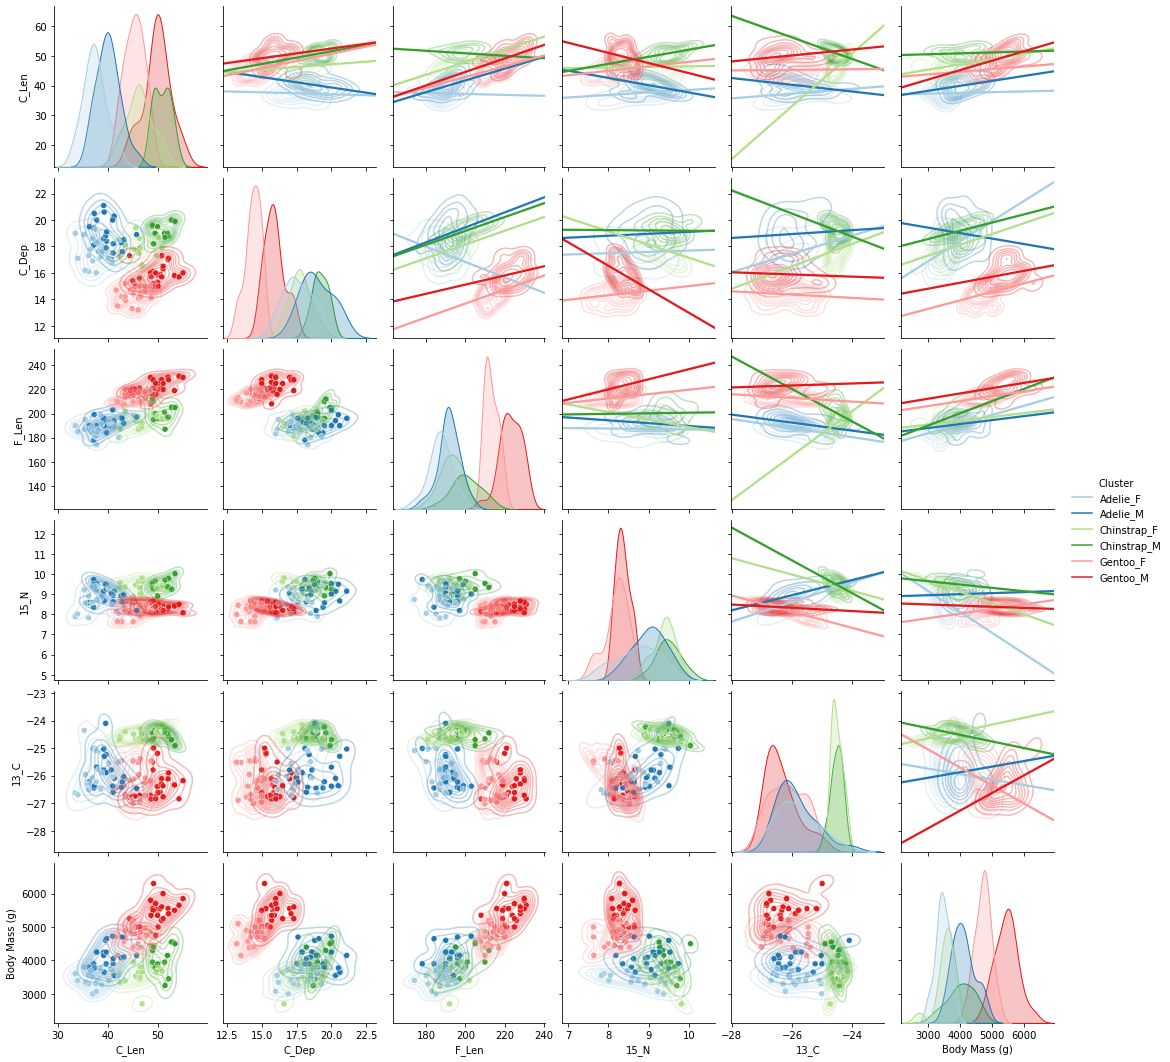

In [11]:
plt.figure(figsize = (15,8))

hue_Data = "Cluster"
g = sns.pairplot(train_data[[*cols_numerical,hue_Data]], hue=hue_Data, 
                 kind="kde", plot_kws={"alpha":0.3}, palette="Paired")
g.map_lower(sns.scatterplot)
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=True)    
display(g)

# palete 색갈 정보  : https://seaborn.pydata.org/tutorial/color_palettes.html

## 4. Fill Null (Sex,15_N, 13_C)
- 정규분포 모양으로 cluster별 데이터가 잘  구분되기 때문에 GaussianNB를 사용하여 Cluster 예측
- 해당 Cluster 데이터를 사용하여 나머지 결측값 예측

In [12]:
from sklearn.naive_bayes  import GaussianNB
from sklearn.metrics      import accuracy_score

# Sex 결측값 예측 학습모델 생성
GNB = GaussianNB()
cols = ['Species','C_Len', 'C_Dep', 'F_Len'] # Species는 One Hot Encoding

# Sex 결측값 예측 학습모델 학습
train_Sex_Y = train_data[train_data['Sex'].notnull()]['Sex']
train_Sex_X = train_data[train_data['Sex'].notnull()][cols]
train_Sex_X = pd.get_dummies(train_Sex_X, columns= ['Species'])
GNB.fit(train_Sex_X,train_Sex_Y)
print("Sex 학습 정확도 :",accuracy_score(train_Sex_Y, GNB.predict(train_Sex_X)))

# test_Sex 데이터 예측 정확도
cols = ['Species','C_Len', 'C_Dep', 'F_Len']
x_test = test_data[test_data['Sex'].notnull()][cols]
x_test = pd.get_dummies(x_test, columns= ['Species'])
y_pred = GNB.predict(x_test)
y_true = test_data[test_data['Sex'].notnull()]['Sex']
print("Sex 예측 정확도 :",accuracy_score(y_true, y_pred))

Sex 학습 정확도 : 0.8558558558558559
Sex 예측 정확도 : 0.8333333333333334


In [13]:
# train 결측값 체우기
idx = train_data['Sex'].isnull() ; 

display(train_data[idx]) #######################################################
train_Sex_nan = train_data[idx][cols]
train_Sex_nan = pd.get_dummies(train_Sex_nan, columns= ['Species'])
if train_Sex_nan.shape[0] > 0 : 
    train_data.at[train_data['Sex'].isnull(),['Sex']] = GNB.predict(train_Sex_nan)
else : print("이미 결측값 체움")
    
train_data = Prepare_Data(train_data)
display(train_data[idx]) #######################################################

,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Body Mass (g),Cluster
6,6,Adelie,Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250,NaN
8,8,Adelie,Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475,NaN
70,70,Gentoo,Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650,NaN


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Body Mass (g),Cluster
70,70,Gentoo,Biscoe,Yes,46.2,14.4,214,FEMALE,8.24253,-26.81540,4650,Gentoo_F
6,6,Adelie,Torgersen,Yes,42.0,20.2,190,MALE,9.13362,-25.09368,4250,Adelie_M
8,8,Adelie,Torgersen,Yes,34.1,18.1,193,FEMALE,NaN,NaN,3475,Adelie_F


In [14]:
# test 결측값 체우기
idx = test_data['Sex'].isnull()

display(test_data[idx]) #######################################################
test_Sex_nan = test_data[idx][cols]
test_Sex_nan = pd.get_dummies(test_Sex_nan, columns= ['Species'])
if test_Sex_nan.shape[0] > 0 : 
    test_data.at[test_data['Sex'].isnull(),['Sex']] = GNB.predict(test_Sex_nan)
else : print("이미 결측값 체움")
    
test_data = Prepare_Data(test_data)
display(test_data[idx]) #######################################################

,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Cluster
46,46,Adelie,Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315,NaN
81,81,Adelie,Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN,NaN
98,98,Gentoo,Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886,NaN
152,152,Gentoo,Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444,NaN
205,205,Adelie,Torgersen,Yes,37.8,17.3,180.0,NaN,NaN,NaN,NaN
209,209,Gentoo,Biscoe,Yes,44.5,14.3,216.0,NaN,7.96621,-25.69327,NaN


C:\ProgramData\Anaconda3\envs\py32\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


,id,Species,Island,Clutch,C_Len,C_Dep,F_Len,Sex,15_N,13_C,Cluster
152,152,Gentoo,Biscoe,Yes,44.5,15.7,217.0,FEMALE,8.04111,-26.18444,Gentoo_F
98,98,Gentoo,Biscoe,Yes,47.3,13.8,216.0,FEMALE,8.25818,-26.23886,Gentoo_F
209,209,Gentoo,Biscoe,Yes,44.5,14.3,216.0,FEMALE,7.96621,-25.69327,Gentoo_F
46,46,Adelie,Torgersen,Yes,37.8,17.1,186.0,FEMALE,8.63243,-25.21315,Adelie_F
81,81,Adelie,Dream,Yes,37.5,18.9,179.0,FEMALE,NaN,NaN,Adelie_F
205,205,Adelie,Torgersen,Yes,37.8,17.3,180.0,FEMALE,NaN,NaN,Adelie_F


In [15]:
df_group_mean = test_data.groupby('Cluster').mean()
display(df_group_mean)

# 호출 형식 
# df_group_mean.loc['Adelie_F']['15_N']

# 13_C , 15_N 열에 해당 Cluster 평균값으로 결측값 입력
for col in ['13_C','15_N']:
    for cat in list(train_data['Cluster'].cat.categories):
        test_data.at[test_data['Cluster']==cat,col] = test_data.loc[test_data['Cluster']==cat,col].fillna(df_group_mean.loc[cat][col])
        train_data.at[train_data['Cluster']==cat,col] = train_data.loc[train_data['Cluster']==cat,col].fillna(df_group_mean.loc[cat][col])

,id,C_Len,C_Dep,F_Len,15_N,13_C
Cluster,,,,,,
Adelie_F,117.327586,37.237931,17.644828,187.672414,8.819026,-25.771811
Adelie_M,115.634615,40.507692,19.115385,192.730769,8.895895,-25.823286
Chinstrap_F,122.400000,46.700000,17.465000,191.100000,9.167210,-24.605492
Chinstrap_M,109.173913,51.178261,19.278261,199.652174,9.458425,-24.528740
Gentoo_F,105.894737,45.705263,14.181579,212.684211,8.181777,-26.200890
Gentoo_M,110.189189,49.224324,15.594595,220.594595,8.270893,-26.056440


### ML 분석용으로 테이블 수정

- [참고 레퍼런스](https://dacon.io/competitions/official/235862/codeshare/4068?page=1&dtype=recent)

In [16]:
from sklearn.model_selection import train_test_split
seed = 7

cols = ['Cluster','C_Len', 'C_Dep', 'F_Len','15_N', '13_C']
X_all = pd.get_dummies(train_data[cols], columns= ['Cluster'])
y_all =train_data['Body Mass (g)']

######### train set 만들기
X_train, X_valid, y_train, y_valid = train_test_split(
    pd.get_dummies(train_data[cols], columns= ['Cluster']),
    train_data['Body Mass (g)'],test_size=0.2,random_state=seed)

######### test set 만들기
test_data = test_data.sort_values(by='id',ascending=True)
X_test = pd.get_dummies(test_data[cols], columns= ['Cluster'])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('AdaR',AdaBoostRegressor()))
models.append(('Xtree',ExtraTreesRegressor()))

### Base

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results =[]
names = []
scoring = 'neg_root_mean_squared_error'

for name, model in models:
    kfold = KFold(n_splits=10,random_state=7,shuffle = True)
    cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
    print(msg)

LR : -277.106156 (86.879229) 
LASSO : -277.650632 (87.870224) 
KNN : -332.453918 (87.491132) 
CART : -414.265009 (85.104851) 
EN : -326.502678 (96.772484) 
SVM : -791.315537 (124.226520) 
RFR : -306.433161 (72.359513) 
AdaR : -314.524220 (80.053657) 
Xtree : -308.528774 (78.155678) 


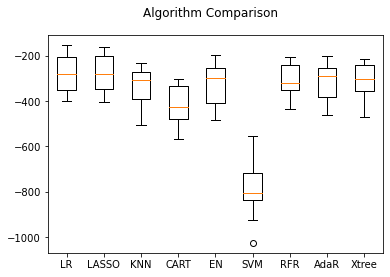

In [19]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### standardization

In [22]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',preprocessing.StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',preprocessing.StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',preprocessing.StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',preprocessing.StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',preprocessing.StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',preprocessing.StandardScaler()),('SVM',SVR())])))
pipelines.append(('ScaledRFR',Pipeline([('Scaler',preprocessing.StandardScaler()),('RFR',RandomForestRegressor())])))
pipelines.append(('ScaledAdaR',Pipeline([('Scaler',preprocessing.StandardScaler()),('AdaR',AdaBoostRegressor())])))
pipelines.append(('ScaledXtree',Pipeline([('Scaler',preprocessing.StandardScaler()),('Xtree',ExtraTreesRegressor())])))

results_scaled =[]
names_scaled = []
for name, model in pipelines:
    kfold = KFold(n_splits=10,random_state=7,shuffle = True)
    cv_results = cross_val_score(model,X_train,y_train
                                 ,cv= kfold,scoring=scoring)
    results_scaled.append(cv_results)
    names_scaled.append(name)
    msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
    print(msg)

ScaledLR : -277.106156 (86.879229) 
ScaledLASSO : -277.277639 (86.691124) 
ScaledKNN : -293.484821 (82.222049) 
ScaledCART : -400.195251 (86.265159) 
ScaledEN : -290.300443 (95.661923) 
ScaledSVM : -779.464140 (123.502954) 
ScaledRFR : -309.249993 (71.040563) 
ScaledAdaR : -311.769518 (86.283266) 
ScaledXtree : -306.895260 (69.357734) 


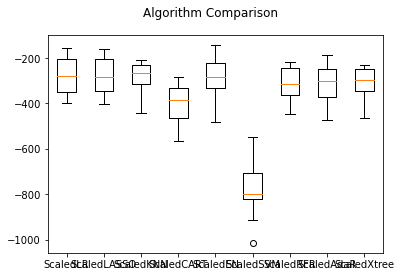

In [23]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_scaled)
ax.set_xticklabels(names_scaled)
plt.show()

### Normalization

In [24]:
pipelines = []
pipelines.append(('NormLR',Pipeline([('Scaler',preprocessing.Normalizer()),('LR',LinearRegression())])))
pipelines.append(('NormLASSO',Pipeline([('Scaler',preprocessing.Normalizer()),('LASSO',Lasso())])))
pipelines.append(('NormKNN',Pipeline([('Scaler',preprocessing.Normalizer()),('KNN',KNeighborsRegressor())])))
pipelines.append(('NormCART',Pipeline([('Scaler',preprocessing.Normalizer()),('CART',DecisionTreeRegressor())])))
pipelines.append(('NormEN',Pipeline([('Scaler',preprocessing.Normalizer()),('EN',ElasticNet())])))
pipelines.append(('NormSVM',Pipeline([('Scaler',preprocessing.Normalizer()),('SVM',SVR())])))
pipelines.append(('NormRFR',Pipeline([('Scaler',preprocessing.Normalizer()),('RFR',RandomForestRegressor())])))
pipelines.append(('NormAdaR',Pipeline([('Scaler',preprocessing.Normalizer()),('AdaR',AdaBoostRegressor())])))
pipelines.append(('NormXtree',Pipeline([('Scaler',preprocessing.Normalizer()),('Xtree',ExtraTreesRegressor())])))

results_norm =[]
names_norm = []
for name, model in pipelines:
    kfold = KFold(n_splits=10,random_state=7,shuffle = True)
    cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
    results_norm.append(cv_results)
    names_norm.append(name)
    msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
    print(msg)

NormLR : -284.205028 (89.635342) 
NormLASSO : -497.541336 (140.789777) 
NormKNN : -319.418454 (73.838347) 
NormCART : -417.102511 (72.861707) 
NormEN : -779.700082 (118.476044) 
NormSVM : -792.055627 (124.216263) 
NormRFR : -310.242538 (60.004930) 
NormAdaR : -312.620363 (58.601824) 
NormXtree : -315.147321 (69.030741) 


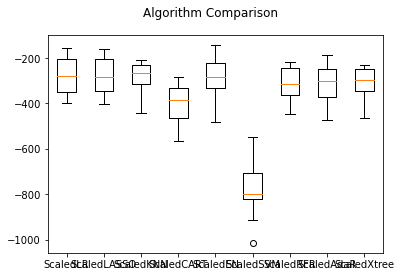

In [25]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_scaled)
ax.set_xticklabels(names_scaled)
plt.show()

### 비교

<Figure size 1152x576 with 0 Axes>

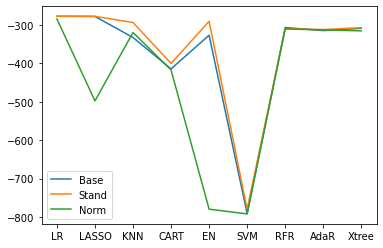

In [26]:
compare_algo_mean = pd.DataFrame([ i.mean() for i in results],columns=['Base'],index=names)
compare_algo_mean['Stand'] = [ i.mean() for i in results_scaled]
compare_algo_mean['Norm'] = [ i.mean() for i in results_norm]

plt.figure(figsize=(16,8))
ax =compare_algo_mean.plot()
plt.xticks(range(len(compare_algo_mean.index)), compare_algo_mean.index)
plt.show()

## 최적 parm 찾기

In [30]:
from sklearn.model_selection import GridSearchCV

num_folds = 7
scaler = preprocessing.StandardScaler().fit(X_all)
scaled_X = scaler.transform(X_all)
params = { 'n_estimators' : [10, 50,100],
           'max_depth' : [6, 12,18,24],
           'min_samples_leaf' : [1, 6, 12, 18],
           'min_samples_split' : [2, 8, 16, 20]
            }
model = RandomForestRegressor()
kfold = KFold(n_splits= num_folds,random_state = seed,shuffle = True)
grid = GridSearchCV(estimator= model, param_grid = params,scoring= 'neg_root_mean_squared_error',cv=kfold )
grid_result = grid.fit(scaled_X,y_all)

print("Best : %f using %s "%(grid_result.best_score_,grid_result.best_params_))

# RandomForestRegressor
# Best : -311.064970 using {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 100} 

Best : -305.330801 using {'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 16, 'n_estimators': 100} 


In [31]:
params = { 'n_estimators' : [10, 50,100],
           'max_depth' : [6,12,18,24],
           'min_samples_leaf' : [1, 6, 12, 18],
           'min_samples_split' : [2,4,8, 16]
            }
model =ExtraTreesRegressor()
kfold = KFold(n_splits= num_folds,random_state = seed,shuffle = True)
grid = GridSearchCV(estimator= model, param_grid = params,scoring= 'neg_root_mean_squared_error',cv=kfold )
grid_result = grid.fit(X_all,y_all)

print("Best : %f using %s "%(grid_result.best_score_,grid_result.best_params_))

# ExtraTreesRegressor
# Best : -294.251045 using {'max_depth': 12, 'min_samples_leaf': 12, 'min_samples_split': 2, 'n_estimators': 10} 

Best : -292.088030 using {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 10} 


#### 앙상블

In [ ]:
from sklearn.metrics import mean_squared_error
import math 

errors = []
pred_valid=[]
pred_test = []

scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_valid = scaler.transform(X_valid)
scaled_X_test = scaler.transform(X_test)

In [ ]:
# Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_valid = lasso.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, lasso_valid))
errors.append(('Lasso',rmse))
pred_valid.append(('Lasso',lasso_valid))
lasso_test = lasso.predict(X_test)
pred_test.append(('Lasso',lasso_test))

In [ ]:
# scaled LR
LR =LinearRegression()
LR.fit(scaled_X_train,y_train)
lr_valid = LR.predict(scaled_X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, lr_valid))
errors.append(('LR',rmse))
pred_valid.append(('LR',lr_valid))
lr_test = LR.predict(scaled_X_test)
pred_test.append(('LR',lr_test))

In [ ]:
# Scaled RF
RF =RandomForestRegressor(max_depth= 12, min_samples_leaf=6, min_samples_split= 20, n_estimators= 100)
RF.fit(scaled_X_train,y_train)
rf_valid = RF.predict(scaled_X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, rf_valid))
errors.append(('RF',rmse))
pred_valid.append(('RF',rf_valid))
rf_test = RF.predict(scaled_X_test)
pred_test.append(('RF',rf_test))

In [ ]:
# Extra Tree
ET =ExtraTreesRegressor(max_depth=12, min_samples_leaf= 12, min_samples_split= 2, n_estimators= 10)
ET.fit(X_train,y_train)
et_valid = ET.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, et_valid))
errors.append(('ET',rmse))
pred_valid.append(('ET',et_valid))
et_test = ET.predict(X_test)
pred_test.append(('ET',et_test))

## Write to CSV

In [ ]:
for name, error in errors: 
    print("%s \t: %s" % (name,error))

In [ ]:
display(X_test.head(2))
display(test_data.head(2))

In [ ]:
import os

for pred in pred_test:
    name, result = pred
    filePath = os.path.join(os.getcwd(),f"penguin_submission({name}).csv")
    print(filePath)

    submission = pd.DataFrame(test_data['id'])
    submission['Body Mass (g)'] = result
    display(submission.head(3))

    submission.to_csv(filePath, index=False)

In [ ]:
os.startfile(os.getcwd()) 